In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import sys
sys.path.append("./drive/MyDrive/ML-Project/RoBERT")

%matplotlib inline
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset into a pandas dataframe.
df=pd.read_csv("./drive/MyDrive/ML-Project/RoBERT/us-consumer-finance-complaints/consumer_complaints.csv")

# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

train_raw = df[df.consumer_complaint_narrative.notnull()]
print('Number of training sentences with complain narrative not null: {:,}\n'.format(train_raw.shape[0]))

# Display 10 random rows from the data.
train_raw.sample(10)

Number of training sentences: 555,957

Number of training sentences with complain narrative not null: 66,806



,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
227406,04/20/2015,Mortgage,FHA mortgage,"Loan servicing, payments, escrow account",NaN,SUMMARY : Adjust my mortgage payment to {$1000...,NaN,Ocwen,CA,925XX,NaN,Consent provided,Web,04/20/2015,Closed with explanation,Yes,Yes,1338379
211736,04/08/2015,Consumer Loan,Vehicle loan,Problems when you are unable to pay,NaN,24 % interest rate high pmts refuses to help w...,NaN,Santander Consumer USA Holdings Inc,GA,306XX,NaN,Consent provided,Web,04/08/2015,Closed with explanation,Yes,No,1320770
229915,05/08/2015,Debt collection,Medical,Communication tactics,Frequent or repeated calls,Synchrony bank starts calling about 1 & 1/2 we...,NaN,Synchrony Financial,SC,291XX,NaN,Consent provided,Web,05/08/2015,Closed with monetary relief,Yes,No,1367888
266187,08/22/2015,Credit reporting,NaN,Improper use of my credit report,Report improperly shared by CRC,Per Equifax reinvestigation confirmation dated...,NaN,Equifax,AR,722XX,NaN,Consent provided,Web,08/22/2015,Closed with non-monetary relief,Yes,Yes,1531439
232104,05/04/2015,Consumer Loan,Installment loan,Managing the loan or lease,NaN,"Original loan amount was XXXX, now I owe over ...",Company chooses not to provide a public response,Citibank,VA,224XX,NaN,Consent provided,Web,05/05/2015,Closed with explanation,Yes,Yes,1358802
317362,11/06/2015,Bank account or service,Checking account,Using a debit or ATM card,NaN,I was charged over draft charges from the use ...,NaN,PNC Bank N.A.,OH,441XX,NaN,Consent provided,Web,11/06/2015,Closed with monetary relief,Yes,No,1643910
290015,09/11/2015,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,The Rushmore Loan Company purchased my mothers...,NaN,Rushmore Loan Management Services LLC,GA,314XX,NaN,Consent provided,Web,09/11/2015,Closed with explanation,Yes,Yes,1560662
298770,09/22/2015,Mortgage,Other mortgage,"Application, originator, mortgage broker",NaN,I am trying to buy my first home with section ...,Company chooses not to provide a public response,Santander Bank US,MA,021XX,NaN,Consent provided,Web,09/22/2015,Closed,Yes,No,1575186
495224,03/10/2016,Credit reporting,NaN,Incorrect information on credit report,Reinserted previously deleted info,A account from XXXX XXXX XXXX appeared on my c...,Company has responded to the consumer and the ...,Experian,CA,946XX,NaN,Consent provided,Web,03/10/2016,Closed with non-monetary relief,Yes,No,1826103
537295,04/10/2016,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,I received a letter from XXXX XXXX Bank XXXX X...,Company has responded to the consumer and the ...,Experian,FL,331XX,NaN,Consent provided,Web,04/10/2016,Closed with non-monetary relief,Yes,No,1872314


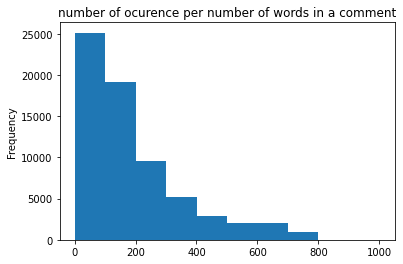

In [4]:
train_raw.consumer_complaint_narrative.apply(lambda x: len(x.split()) if len(x.split())<1000 else 1000).plot(kind='hist', title="number of ocurence per number of words in a comment")

In [ ]:
train_raw['len_txt'] =train_raw.consumer_complaint_narrative.apply(lambda x: len(x.split()))
train_raw.describe()

,complaint_id,len_txt
count,6.680600e+04,66806.000000
mean,1.571665e+06,190.644014
std,1.545692e+05,166.830597
min,1.290181e+06,1.000000
25%,1.443264e+06,71.000000
50%,1.569485e+06,136.000000
75%,1.702750e+06,254.000000
max,1.888608e+06,1284.000000


In [ ]:
#Select only the row with number of words greater than 250:
train_raw = train_raw[train_raw.len_txt >249]
train_raw.shape

(17142, 19)

In [ ]:
#Select only the column 'consumer_complaint_narrative' and 'product'
train_raw = train_raw[['consumer_complaint_narrative', 'product']]
train_raw.reset_index(inplace=True, drop=True)
train_raw.head()

,consumer_complaint_narrative,product
0,In XX/XX/XXXX my wages that I earned at my job...,Mortgage
1,XXXX was submitted XX/XX/XXXX. At the time I s...,Mortgage
2,I spoke to XXXX of green tree representatives ...,Mortgage
3,i opened XXXX Bank of America credit cards 15-...,Credit card
4,I applied for a loan with XXXX XXXX and had pu...,Consumer Loan


,consumer_complaint_narrative,product
0,In XX/XX/XXXX my wages that I earned at my job...,Mortgage
1,XXXX was submitted XX/XX/XXXX. At the time I s...,Mortgage
2,I spoke to XXXX of green tree representatives ...,Mortgage
3,i opened XXXX Bank of America credit cards 15-...,Credit card or prepaid card
4,I applied for a loan with XXXX XXXX and had pu...,Consumer Loan


In [ ]:
#all the different classes
for l in np.unique(train_raw['product']):
    print(l)

Bank account or service
Consumer Loan
Credit card or prepaid card
Credit reporting, credit repair services, or other personal consumer reports
Debt collection
Money transfers
Mortgage
Other financial service
Payday loan, title loan, or personal loan
Student loan


In [ ]:
train_raw=train_raw.rename(columns = {'consumer_complaint_narrative':'text', 'product':'label'})
train_raw.head()

,text,label
0,In XX/XX/XXXX my wages that I earned at my job...,Mortgage
1,XXXX was submitted XX/XX/XXXX. At the time I s...,Mortgage
2,I spoke to XXXX of green tree representatives ...,Mortgage
3,i opened XXXX Bank of America credit cards 15-...,Credit card or prepaid card
4,I applied for a loan with XXXX XXXX and had pu...,Consumer Loan
